In [ ]:
from google.colab import drive
drive.mount('/content/drive')
 
!pip install keras numpy h5py matplotlib tensorboardx tqdm 
import os
import os.path
import sys
import h5py
import numpy as np
import pickle
 
import matplotlib.pyplot as plt
import datetime, os
import time
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms.functional_tensor as F_t
 
from torchvision.utils import make_grid
import pickle
import cv2
from io import BytesIO
from PIL import Image
import zipfile
import gc
import math, os
from random import shuffle
import matplotlib.pyplot as plt
 
from tensorboardX import SummaryWriter
 
IMAGE_WIDTH = 250
IMAGE_HEIGHT = 32
CUDA = torch.cuda.device_count()
device = 'cuda'

Mounted at /content/drive
     |████████████████████████████████| 317kB 12.8MB/s 


In [ ]:
if False:
  !wget https://www.robots.ox.ac.uk/~vgg/data/text/mjsynth.tar.gz
  !7z x "/content/mjsynth.tar.gz"
  !rm -f "/content/mjsynth.tar.gz"
  !mv "/content/mnt/ramdisk/max/90kDICT32px/annotation.txt" "/content/mnt/ramdisk/max/90kDICT32px/annotation_test.txt" "/content/mnt/ramdisk/max/90kDICT32px/annotation_train.txt" "/content/mnt/ramdisk/max/90kDICT32px/annotation_val.txt" "/content/mnt/ramdisk/max/90kDICT32px/imlist.txt" "/content/mnt/ramdisk/max/90kDICT32

  import tarfile
  tar = tarfile.open("/content/mjsynth.tar", "r")
  k=0
  files = []
  for tarinfo in tar:
      if k >10:
        break
      a = tarinfo.name.split('/')
      if len(a) != 5:
        continue
      k+=1
      files.append(a[4])x
      print(k, tarinfo.name)
  print(len(files))

In [ ]:
if False:
  for j in range(1,2):
    nzipfile = "da_starts_with2{}_to2{}.zip".format(j,j+4)
    print("extracting {}".format(nzipfile))
    files = ' '.join(['mnt/ramdisk/max/90kDICT32px/2{}*'.format(h + j*5) for h in range(5)])
    get_ipython().system_piped("7z x '/content/mjsynth.tar' {} -aoa".format(files))
    
    print("\tzipping {}".format(nzipfile))
    get_ipython().system_raw("zip -r -0 {} mnt/ramdisk/max/90kDICT32px".format(nzipfile))
    print("\tmoving {}".format(nzipfile))
    get_ipython().system_piped("mv {} '/content/drive/My Drive/datasets/AdvCVdataset/'".format(nzipfile))
    get_ipython().system_piped("rm -rf mnt".format(nzipfile))
    print("\tarchive {} success created".format(nzipfile))

  if False:
    nzipfile = "da_starts_with{}.zip".format('5andmore')
    print("extracting {}".format(nzipfile))

    get_ipython().system_piped("7z x '/content/mjsynth.tar' -x\!'mnt/ramdisk/max/90kDICT32px/1*' -x\!'mnt/ramdisk/max/90kDICT32px/2*' -x\!'mnt/ramdisk/max/90kDICT32px/3*' -x\!'mnt/ramdisk/max/90kDICT32px/4*' -xr\!'*.txt' -aoa")
      
    print("\tzipping {}".format(nzipfile))
    get_ipython().system_raw("zip -r -0 {} mnt/ramdisk/max/90kDICT32px".format(nzipfile))
    print("\tmoving {}".format(nzipfile))
    get_ipython().system_piped("mv {} '/content/drive/My Drive/datasets/AdvCVdataset/'".format(nzipfile))
    get_ipython().system_piped("rm -rf mnt".format(nzipfile))
    print("\tarchive {} success created".format(nzipfile))

In [ ]:
if False:
  !mkdir "smalldataset"
  k = 0
  MAX_K = 100
  for root,d_names,f_names in os.walk("/content/drive/My Drive/datasets/AdvCVdataset/ramdisk"):
      for _file in f_names:
        if k>MAX_K:
          break
        filename = os.path.join(root, _file)
        #print(filename)
        get_ipython().system_raw("cp '{}' '/content/smalldataset/'".format(filename))
        k+=1
      if k>MAX_K:
          break


  print("files in smalldataset:")
  for root,d_names,f_names in os.walk("/content/smalldataset"):
    for _file in f_names:
      filename = os.path.join(root, _file)
      print('\t',filename)


In [ ]:
!cp "/content/drive/My Drive/datasets/AdvCVdataset/annotation_train.txt" ./
!cp "/content/drive/My Drive/datasets/AdvCVdataset/da_starts_with1.zip" ./
!cp "/content/drive/My Drive/datasets/AdvCVdataset/da_starts_with2.zip" ./
!cp "/content/drive/My Drive/datasets/AdvCVdataset/da_starts_with3.zip" ./
!cp "/content/drive/My Drive/datasets/AdvCVdataset/da_starts_with4.zip" ./
!cp "/content/drive/My Drive/datasets/AdvCVdataset/da_starts_with5andmore.zip" ./

In [ ]:
#!zipmerge /content/da_starts_with20_to24.zip /content/da_starts_with21_to25.zip
#!cp /content/da_starts_with2.zip "/content/drive/My Drive/datasets/AdvCVdataset/"
#!cp "/content/drive/My Drive/datasets/AdvCVdataset/annotation_train.txt" ./

In [ ]:
try:
  del zipLoader
except:
  pass
gc.collect()

class zipFileLoader():
  def __init__(self, h, w):
    self.zipes = dict()
    self.shape = (h, w, 3)
    if True:
      for i in range(1,5):
        print(f"handling zip {i}")
        self.zipes[f'{i}'] = zipfile.ZipFile(f"da_starts_with{i}.zip","r")
    other = zipfile.ZipFile(f"da_starts_with5andmore.zip","r")
    
    for i in '56789':
      self.zipes[i] = other
     
  def file_exists(self, filename):
    a = filename[0]
    if a in self.zipes:
      try:
        return self.zipes[a].getinfo(f"mnt/ramdisk/max/90kDICT32px/{filename}")
      except KeyError:
        return False
    else:
      return False

# mnt/ramdisk/max/90kDICT32px/
  def __call__(self, filename):
    #./2697/6/255_airier_1753.jpg
    try:
      folder_first_sympol = filename[0]
      filedata = self.zipes[folder_first_sympol].read(f"mnt/ramdisk/max/90kDICT32px/{filename}")
      dataEnc = BytesIO(filedata)
      sample = Image.open(dataEnc).convert('RGB')
      dataEnc.close()
      return sample
    except Exception as e:
      print(f"file: {filename}, exception: {e}")
      return np.zeros(self.shape)

zipLoader = zipFileLoader(IMAGE_HEIGHT, IMAGE_WIDTH)

handling zip 1
handling zip 2
handling zip 3
handling zip 4


In [ ]:
BLANK_IDX = 0
IMAGE_WIDTH = 250
IMAGE_HEIGHT = 32
alphabet = '_ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789' #zero is blank
READFROMFOLDER = False
def label_decode(filename):
  label = filename.split('_')[1]
  return [alphabet.index(l) for l in label]




class simple_loader():
  @staticmethod
  def file_exists(filename):
    return os.access(filename, os.R_OK) 
  @staticmethod
  def __call__(name):
    return Image.open(name).convert('RGB')


# bad 1650/2/355_stony_74902.jpg,
class SyntheticWordDataset(Dataset):
    def __init__(self, _type='train', _transforms=None, loader_func=simple_loader):
        assert _type in ['test', 'train', 'val']
        self.loader = loader_func
        self.transforms = _transforms
        self.resize = transforms.Resize(IMAGE_HEIGHT)
        self.resize_big_image = transforms.Resize((IMAGE_HEIGHT, IMAGE_WIDTH))
        self.to_tensor = transforms.ToTensor()
        self.samples = []
        self.labels = []

        #./2697/6/255_airier_1753.jpg
        
        if READFROMFOLDER:
          for root,d_names,f_names in os.walk("/content/smalldataset"):
            for _file in f_names:

              filename = os.path.join(root, _file)
              self.samples.append(filename)
              self.labels.append(label_decode(_file))
        else:
          k=0
          with open(f"annotation_{_type}.txt") as f:
            data = f.read().split('\n')
          #./2697/6/466_MONIKER_49537.jpg 49537
          for raw in data:
            k+=1
            if k==10000: break
            filename = raw.split(' ')[0][2:]
            try:
              label = label_decode(filename)
              if self.loader.file_exists(filename):
                self.labels.append(label)
                self.samples.append(filename)
            except Exception as e:
              print(filename, e)
        print(f"{_type} dataset len = {len(self.samples)}")

    def __len__(self):
        return len(self.labels)

    def get_label(self, indices):
      return [self.labels[i] for i in indices]


    def __getitem__(self, index):
        name = self.samples[index]

        sample = self.loader(name)
        #sample = self.resize(sample)
        sample = transforms.functional.pad(sample, (0,0,1,0), sample.getpixel((-1,0)), 'constant')
        w, h = sample.size
        new_w = int(w * IMAGE_HEIGHT / h)
        if new_w < IMAGE_WIDTH:
          sample = transforms.functional.resize(sample, size=(IMAGE_HEIGHT, new_w), interpolation=Image.BILINEAR)
          sample = self.to_tensor(sample).float()
          sample = F.pad(sample[None],[0,IMAGE_WIDTH - sample.size(2),0,0], mode='replicate')[0]
        else:
          sample = self.to_tensor(self.resize_big_image(sample)).float()
        if self.transforms:
          sample = self.transforms(sample)
        return sample, index, len(self.labels[index])



train dataset len = 9999


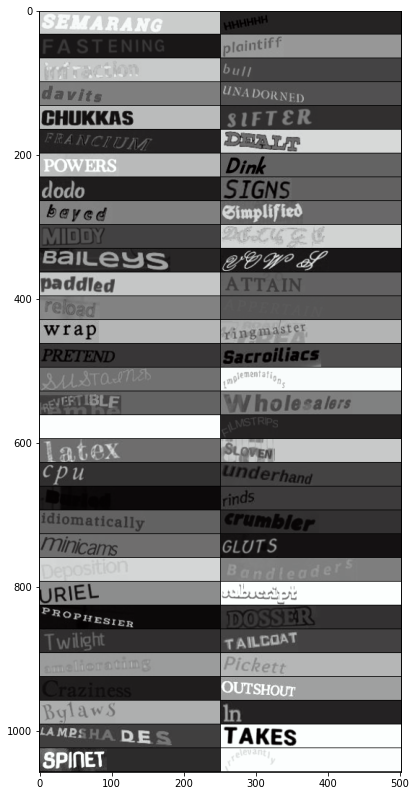

In [ ]:
gc.collect()
BS = 64
train_transform = transforms.Compose(
        [
            #transforms.RandomResizedCrop(224,scale=(0.15, 1.0)),
            #transforms.RandomHorizontalFlip(),
            transforms.ColorJitter(saturation=0.5, contrast=0.5, brightness=0.5),
            
            #transforms.Normalize((123.68 / 255, 116.779 / 255, 103.939/ 255), (58.393 / 255, 57.12 / 255, 57.375 / 255)),
            transforms.Normalize((0.4692, 0.4692, 0.4692), (58.393 / 255, 57.12 / 255, 57.375 / 255)),
            #transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
        ]
    )

trainset = SyntheticWordDataset('train', _transforms=train_transform, loader_func=zipLoader)
train_loader = DataLoader(trainset, batch_size=BS, shuffle=True)

def prin_batch():
    TRAIN=1

    
    epochs = 0
    epoch = 0
    for images, label_indices, lengths in train_loader:
      epoch+=1
      #trainset.get_label(label_indices)
      break
    
    img = images.data 
    img = img - img.min()
    img = img / img.max()
    img = make_grid(img, nrow=2, padding=1).numpy()
    img = np.rollaxis(img, 0, 3)

    plt.figure(figsize=(14, 14)), plt.imshow(img), plt.show()
    if False:
        plt.figure(figsize=(14, 5)), plt.imshow(img[:,:,0]), plt.show()
        plt.figure(figsize=(14, 5)), plt.imshow(img[:,:,1]), plt.show()
        plt.figure(figsize=(14, 5)), plt.imshow(img[:,:,2]), plt.show()

prin_batch()

In [ ]:
classes = '_ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'

def encode(label):
  out = torch.zeros((1, len(label),len(classes)))
  for i,s in enumerate(label):
    out[0, i, classes.index(s)] = 1
  return out



def decode_output(out):
  '''
      :param out: BatchSize x T x |A| size
      :return labels: list of string
  '''
  max = out.argmax(dim=2) #indices
  labels = []
  for indices in max:
    # img T x 1
    last = indices[0] #can use diff?
    label = []
    if last != BLANK_IDX:
      label.append(last)
    for i in indices:
      if last != i: 
        last = i
        if i >= 0:
         label.append(i)
    labels.append(''.join([classes[j] for j in label]))
  return labels

a = torch.rand((2,50,len(classes)))
l = '_aa___dd_as_q___'
print(decode_output(a))
print(decode_output(encode(l)))



['oCXfQ3C0JjhUgR3znuTPKMhIQHEadhWZsCx6wWQhSsILp9PT', 'OoicSlBIZt5Hk2B2DXIxuvDNvgIPne3nhmX4EI9BE7PxGh9F']
['a_d_as_q_']


In [ ]:
S = IMAGE_WIDTH * IMAGE_HEIGHT 
def mean():
    BS = 32
    TRAIN=1
    if TRAIN:
        test_loader = DataLoader(trainset, batch_size=BS, shuffle=True)
    else:
        test_loader = DataLoader(testset, batch_size=BS, shuffle=True)
    #train_loader = DataLoader(trainset, batch_size=BS, shuffle=True)
    
    epochs = 0
    epoch = 0
    batch_count = len(test_loader)
    mean = 0
    for images, label_indices, lengts in test_loader:
      epoch += 1
      a = images.sum(dim=3).sum(dim=2).sum(dim=0) / images.size(0) /  S
      if epoch == 1:
        mean = a 
      else:
        mean = ( mean * (epoch-1) + a) / epoch
      print(f"\r{epoch}/{batch_count} cur_mean={mean}", end='')    
#mean() #cur_mean=tensor([0.4692, 0.4692, 0.4692])


In [ ]:
M = 8#32 // 4
N = 6
BLANK_IDX = 0

EPS = 1e-5
alphabet = '_ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
from multiprocessing import Pool
THREAD_COUNT = 2
MULTIPROCESS = False
class CTCLoss(torch.autograd.Function):

    
    @staticmethod
    def alpha_beta_loss(args):
        input, label = args
        label_len = len(label)
        L = 2 * label_len + 1

        T = input.size(0)
        alpha = torch.zeros((T, L))
        alpha[0, 0] = input[0, BLANK_IDX]
        alpha[0, 1] = input[0, label[0]]

        beta = torch.zeros((T, L))
        beta[-1, L - 1] = input[-1, BLANK_IDX]
        beta[-1, L - 2] = input[-1, label[0]]

        loss = 0
        c = alpha[0, 0:2].sum()
        if c > 0:
          alpha[0, 0:2] = alpha[0, 0:2] / c 
          loss += torch.log(c)
        '''
        else:
          loss_list[index] = 0
          a_b_list[index] = alpha
          L_list[index] = L
          return 0, alpha, L
        '''

        
        d = beta[-1, :].sum()
        if d>0:
          beta[-1, :] = beta[-1, :] / d

        for t in range(1, T): #for beta from T-2 to 0
            t1 = T - 1 - t # t beta
            start = max(0, L -2*(T - t))
            end = min(2*t + 2, L)
            start_beta = max(0, L -2*(T - t1))
            end_beta = min(2*t1 + 2, L)
            for s in range(start, L):
                ##alpha
                red = alpha[t - 1, s]
                blue = alpha[t - 1, s - 1] if s > 0 else 0
                i = (s - 1) // 2 if s > 0 else 0  # t=2 s=5
                if s % 2 == 0:
                    alpha[t, s] = (red + blue) * input[t, BLANK_IDX]
                elif s == 1 or label[i] == label[i - 1]:
                    alpha[t, s] = (red + blue) * input[t, label[i]]
                else:
                    orange = alpha[t - 1, s - 2] if s > 1 else 0
                    alpha[t, s] = (red + blue + orange) * input[t, label[i]]

                ##beta
                s1 = L - 1 - s
                red = beta[t1 + 1, s1]
                blue = beta[t1 + 1, s1 + 1] if s1 < L - 1 else 0
                i = (s1 - 1) // 2 if s1 > 0 else 0  # label idx
                if s1 % 2 == 0:
                    beta[t1, s1] = (red + blue) * input[t1, BLANK_IDX]
                elif s1 == L - 2 or label[i] == label[i + 1]:
                    beta[t1, s1] = (red + blue) * input[t1, label[i]]
                else:
                    orange = beta[t1 + 1, s1 + 2] if s1 < L - 2 else 0
                    beta[t1, s1] = (red + blue + orange) * input[t1, label[i]]

            c = alpha[t, start:end].sum()
            if c > 0:
              alpha[t, start:end] = alpha[t, start:end] / c
              loss += torch.log(c)

            d = beta[t1, start_beta:end_beta].sum()
            if d> 0:
              beta[t1, start_beta:end_beta] = beta[t1, start_beta:end_beta] / d

        return loss, alpha*beta, L



    @staticmethod
    def forward(ctx, batch, labels):
        '''
            :param input: T x |A| size
            :param label: list of lists with indices
            :return:
        '''
        #batch = CTCLoss.softmax(batch)
        batch = batch.softmax(2)
        #print(batch)
        if CUDA:
          batch = batch.to('cpu')

        batch_size = batch.size(0)
        
        if MULTIPROCESS:
          with Pool(THREAD_COUNT) as p:
            res = p.map(CTCLoss.alpha_beta_loss,
                  [( batch[i], labels[i]) for i in range(batch_size)])
        else:
          res = []
          for batch_index in range(batch_size):
              input, label = batch[batch_index], labels[batch_index]
              res.append(CTCLoss.alpha_beta_loss([input, label]))

        #print(res)
        ctx.save_for_backward(batch)
        ctx.res = res
        #ctx.L_arr = L_arr
        loss = torch.zeros(1)
        for l, _, _ in res: loss+=l
        return -loss #/ batch_size


    @staticmethod
    def compute_grad(args):
        L, out, ab = args
        T = out.size(0)
        nn_alphabet_size = out.size(1)
        grad = torch.zeros((T, nn_alphabet_size))
        
        ab_copy = ab.clone()
        #print(T, nn_alphabet_size)
        for s in range(0, L):
            if s % 2 == 0:
                grad[:, BLANK_IDX] = grad[:, BLANK_IDX] + ab[:, s]
                ab[:, s] = ab[:, s] / (out[:, BLANK_IDX])
            else:
                i = (s - 1) // 2
                grad[:, i] = grad[:, i] + ab_copy[:, i]
                ab[:, s] = ab[:, s] / (out[:, i])
        absum = ab.sum(dim=1)[:, None]
        grad = out - grad / (out * absum)
        grad[grad != grad] = 0 
        grad[grad == float('inf')] = 0
        grad[grad == -float('inf')] = 0

        return grad


    @staticmethod
    def backward(ctx, grad_output): ##hz .backward() enought
        batch, = ctx.saved_tensors
        res = ctx.res #loss, alpha*beta, L
        batch_size = batch.size(0)
        
        #print(a_b, batch, L_arr)
        if MULTIPROCESS:
          with Pool(THREAD_COUNT) as p:
            grads = p.map(CTCLoss.compute_grad,[(res[i][2], batch[i], res[i][1],
                                          ) for i in range(batch_size)])
        else:
            grads = []
            for i in range(batch_size):
                L, out, ab = res[i][2], batch[i], res[i][1]
                grads.append(CTCLoss.compute_grad( [L, out, ab]))

        #print(torch.stack(grads).size())
        grad = torch.stack(grads) / batch_size
        
        if CUDA:
          grad = grad.to(device)
        print(grad.sum())
        return grad, None

    def __call__(self, *args, **kwargs):
        return self.apply(*args, **kwargs)


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.loss = CTCLoss()

    def forward(self, x, labels):
        return self.loss(x, labels)

print("STARTING CTC LOSS")

out = torch.ones((1, M, 10))#torch.ones((M, N))
model = nn.Linear(10,N)
out = model(out)
print(out.size())
if CUDA:
  model = model.to(device)
  out = out.to(device)
#print(out)
loss = CTCLoss()
loss_value = loss(out, [[1, 2, 2, 3], [3,4,1]])
loss_value.backward()
print(loss_value)

STARTING CTC LOSS
torch.Size([1, 8, 6])
tensor(0.9946, device='cuda:0')
tensor([9.5632], grad_fn=<CTCLossBackward>)


In [ ]:
BN_ZERO_GAMMA = False

classes = '_ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
#IMAGE_WIDTH * IMAGE_HEIGHT 

def MyConv(in_channels, out_channels, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=False, zero_bn_gamma=True, conv_accum=None):
    conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding,bias=bias)
    torch.nn.init.xavier_uniform_(conv.weight)
    if bias:
        torch.nn.init.zeros_(conv.bias)
    if conv_accum is not None:
        conv_accum.append(conv.weight)
    if False:
      bn = nn.BatchNorm2d(out_channels, affine=True, track_running_stats=False)
      if BN_ZERO_GAMMA and zero_bn_gamma:
          torch.nn.init.zeros_(bn.weight)
      return nn.Sequential(conv, bn)
    else:
      return nn.Sequential(conv, nn.LeakyReLU())

def MyBatchNorm(out_channels):
    bn = nn.BatchNorm2d(out_channels, affine=True, track_running_stats=False)
    if BN_ZERO_GAMMA:
        torch.nn.init.zeros_(bn.weight)
    return bn

def MyReccurentConv(in_channels, out_channels, kernel_size=(1, 1), stride=(1, 1), padding=(0, 0), bias=False, zero_bn_gamma=True, conv_accum=None):
    conv = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding,bias=bias)
    torch.nn.init.xavier_uniform_(conv.weight)
    if bias:
        torch.nn.init.zeros_(conv.bias)
    if conv_accum is not None:
        conv_accum.append(conv.weight)

    bn = nn.BatchNorm2d(out_channels, affine=True, track_running_stats=False)
    if BN_ZERO_GAMMA and zero_bn_gamma:
        torch.nn.init.zeros_(bn.weight)

    conv2 = nn.Conv2d(in_channels, out_channels, kernel_size=kernel_size, stride=stride, padding=padding,bias=bias)
    torch.nn.init.xavier_uniform_(conv2.weight)
    if bias:
        torch.nn.init.zeros_(conv2.bias)
    if conv_accum is not None:
        conv_accum.append(conv2.weight)

    bn2 = nn.BatchNorm2d(out_channels, affine=True, track_running_stats=False)
    if BN_ZERO_GAMMA and zero_bn_gamma:
        torch.nn.init.zeros_(bn2.weight)

    return nn.Sequential(conv, bn, nn.LeakyReLU(), conv2, bn2, nn.LeakyReLU())
    

class DeepTextSpotter(nn.Module):
    def __init__(self, class_count):
        super(DeepTextSpotter, self).__init__()
        self.conv_weights = []
        layers = [
                  MyConv(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  MyConv(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  nn.MaxPool2d((2, 2), stride=(2, 2), padding=(0, 0)),
                  MyConv(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  MyBatchNorm(64),
                  MyReccurentConv(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  nn.MaxPool2d((2, 2), stride=(2, 2), padding=(0, 0)),
                  MyConv(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  MyBatchNorm(128),
                  MyReccurentConv(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  nn.MaxPool2d((2, 2), stride=(2, 1), padding=(0, 0)),
                  MyConv(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  MyBatchNorm(256),
                  MyReccurentConv(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), conv_accum=self.conv_weights),
                  nn.MaxPool2d((2, 2), stride=(2, 1), padding=(0, 0)),
                  MyConv(256, 512, kernel_size=(2, 3), stride=(1, 1), padding=(0, 1), conv_accum=self.conv_weights),
                  MyConv(512, 512, kernel_size=(1, 5), stride=(1, 1), padding=(0, 0), conv_accum=self.conv_weights),

                  MyConv(512, class_count, kernel_size=(1, 7), stride=(1, 1), padding=(0, 0), conv_accum=self.conv_weights),
                  #nn.Softmax(dim=1),
                  ]
        #self.s = nn.Softmax(dim=2)

        #layers += [nn.AvgPool2d((7, 7))]
        self.layers = nn.Sequential(
            *layers
        )

    def forward(self, x):
        x = self.layers(x)
        x = x.view(x.size(0), x.size(1),-1)
        x = torch.transpose(x, 1, 2)
        return x#self.s(x)

dummy = torch.ones((1, 3, IMAGE_HEIGHT, IMAGE_WIDTH))



if True:
    model = DeepTextSpotter(len(classes))
    print(model)
    out = model(dummy)
    print(out.shape)
    print(out.sum(dim=2))
    loss = CTCLoss()
    loss_value = loss(softmax_out, [[1, 2, 2, 3], [3,4,1]])
    loss_value.backward()

DeepTextSpotter(
  (layers): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=(0, 0), dilation=1, ceil_mode=False)
    (3): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): LeakyReLU(negative_slope=0.01)
    )
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
    (5): Sequential(
      (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (2): LeakyReLU(negative_slope=0.01)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=

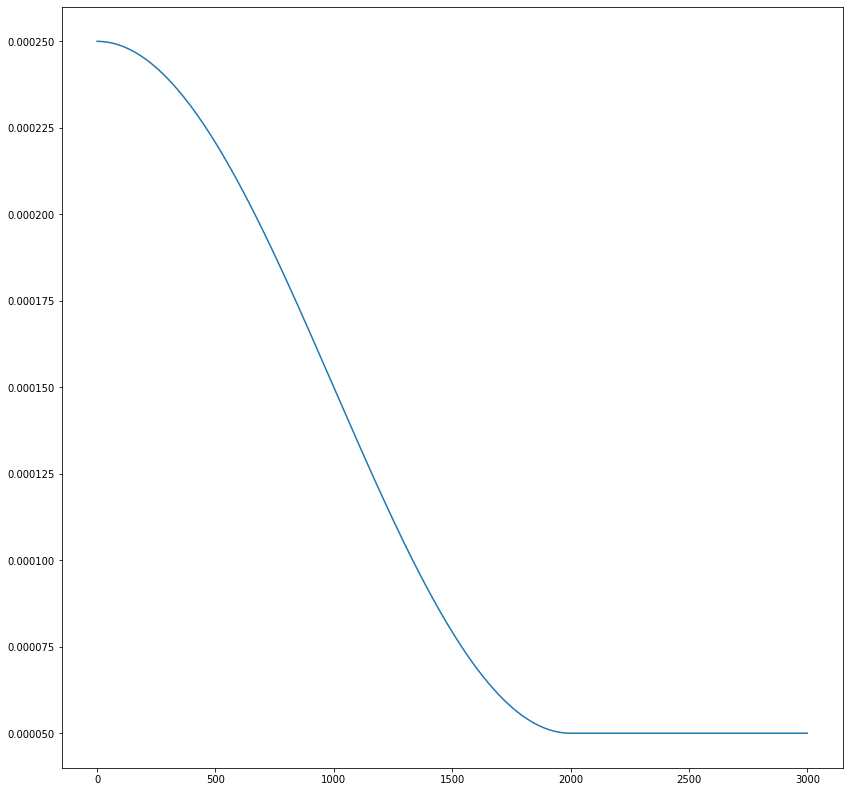

In [ ]:
class MyWarmupCosineAnnealingLR(torch.optim.lr_scheduler._LRScheduler):
    r"""
    Args:
        optimizer (Optimizer): Wrapped optimizer.
        linear_lr_m (int): линейная часть
        T_max (int): Maximum number of iterations.
        eta_min (float): Minimum learning rate. Default: 0.
        last_epoch (int): The index of last epoch. Default: -1.
    """

    def __init__(self, optimizer, linear_lr_m, T_max, eta_min=0, sin_max=0.01,last_epoch=-1):
        self.linear_lr_m = linear_lr_m
        self.T_max = T_max
        self.eta_min = eta_min
        self.sin_max = sin_max
        super(MyWarmupCosineAnnealingLR, self).__init__(optimizer, last_epoch)

    def get_lr(self):
        ''' копипаста cosine lr
        выдать список новых lr. base_lrs = [gr['init_lr'] for rg in opt.groups]'''
        if not self._get_lr_called_within_step:
            warnings.warn("To get the last learning rate computed by the scheduler, "
                          "please use `get_last_lr()`.", UserWarning)

        if self.last_epoch == 0:
            return [lr / self.linear_lr_m for lr in self.base_lrs] # initial lrs
        elif self.last_epoch <self.linear_lr_m:
            return [ (self.last_epoch + 1) * lr / self.linear_lr_m for lr in self.base_lrs]
        elif (self.last_epoch - self.linear_lr_m  - self.T_max) % (2 * self.T_max) == 0:
            return [group['lr'] + (self.sin_max - self.eta_min) *
                    (1 - math.cos(math.pi / self.T_max)) / 2
                    for base_lr, group in
                    zip(self.base_lrs, self.optimizer.param_groups)]
        return [(1 + math.cos(math.pi * (self.last_epoch - self.linear_lr_m +1) / self.T_max)) /
                (1 + math.cos(math.pi * (self.last_epoch - self.linear_lr_m ) / self.T_max)) *
                (group['lr'] - self.eta_min) + self.eta_min
                for group in self.optimizer.param_groups]

    def _get_closed_form_lr(self):
        return [self.eta_min + (base_lr - self.eta_min) *
                (1 + math.cos(math.pi * (self.last_epoch - self.linear_lr_m) / self.T_max)) / 2
                for base_lr in self.base_lrs]


def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

'''
BS = 64
LR = 0.01 * BS / 256
linear_lr_m = 100 # количество эпох для линейного увеличения
T_max = 2000
eta_min = 0.00005
SIN_MAX = 0.00005
'''
BS = 64
LR = 0.001 * BS / 256
linear_lr_m = 1 # количество эпох для линейного увеличения
T_max = 2000
eta_min = 0.00005
SIN_MAX = 0.00005

def test_lr():
  optimizer = torch.optim.SGD([torch.rand((2,2))], lr=LR, momentum=0.9, weight_decay=0, nesterov=True)
  sched =  MyWarmupCosineAnnealingLR(optimizer,linear_lr_m, T_max, eta_min=eta_min, sin_max=SIN_MAX, last_epoch=-1)
  lrs = [get_lr(optimizer)]
  optimizer.step()
  sched.step()
  for i in range(3000):
      lrs.append(get_lr(optimizer)), optimizer.step(), sched.step()
  plt.figure(figsize=(14, 14))
  plt.plot(lrs)
  plt.show()

test_lr()

torch.Size([64, 3, 32, 250]) torch.Size([64])


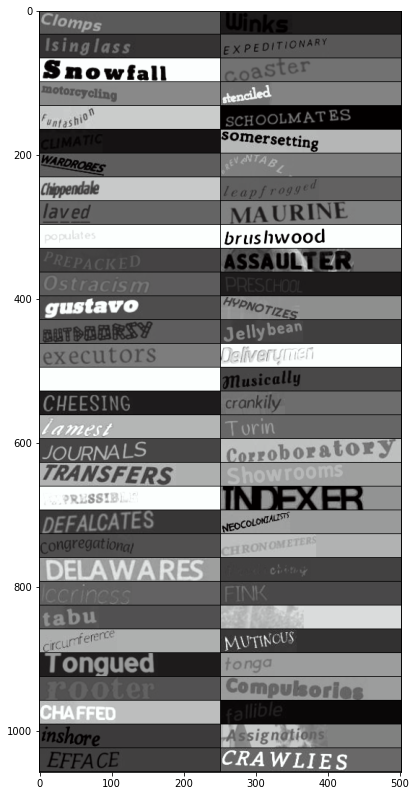

tensor(7.3684, device='cuda:0')
epoch : 2, train loss : 11173.39453125['HI9IHzHz9', '9z9H9zL', 'IzH9NIHzHz9I9zIzI', 'H9ILIHIHz2HIHIHI9z9I9', 'zHzH9H9Hz9zIHIHzIH9zLzL']
tensor(-18035.3711, device='cuda:0')
epoch : 3, train loss : 5346.63671875['', '', '', '', '']
tensor(0., device='cuda:0')
epoch : 4, train loss : 0.0['B', 'B', 'B', 'B', 'B']
tensor(0., device='cuda:0')
epoch : 5, train loss : 0.0['B', 'B', 'B', 'B', 'B']
tensor(0., device='cuda:0')
epoch : 6, train loss : 0.0['B', 'B', 'B', 'B', 'B']
tensor(0., device='cuda:0')
epoch : 7, train loss : 0.0['B', 'B', 'B', 'B', 'B']
tensor(0., device='cuda:0')
epoch : 8, train loss : 0.0['B', 'B', 'B', 'B', 'B']


KeyboardInterrupt: ignored

In [ ]:
WD = 8e-6
MOMENTUM = 0.9
STANDART_CTC_LOSS = False
def one_batch_overfit():
    gc.collect()
    mean_train_losses = []
    mean_test_losses = []
    test_acc_list = []
    model = DeepTextSpotter(len(classes))

    if CUDA:
      model = model.to(device)
   
    #test_loader = DataLoader(testset, batch_size=BS, shuffle=False)
    
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
    optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM, weight_decay=WD, nesterov=True)
    #optimizer = torch.optim.Adam(model.parameters(), lr=LR, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True) 

    scheduler =  MyWarmupCosineAnnealingLR(optimizer,linear_lr_m, T_max, eta_min=eta_min, sin_max=SIN_MAX, last_epoch=-1)
    
    if STANDART_CTC_LOSS:
      loss_fn = nn.CTCLoss(zero_infinity=True)#CTCLoss()
    else:
      loss_fn = CTCLoss()
    epochs = 0
    epoch = 0
    images, labels_indices, lengths = iter(train_loader).next()
    print(images.shape, labels_indices.shape)
    
    labels = trainset.get_label(labels_indices)
    if STANDART_CTC_LOSS:

      m = torch.max(lengths)
      batch_labels = torch.zeros((lengths.size(0),m))
      for i in range(len(labels)):
        batch_labels[i,0:lengths[i]] = torch.tensor(labels[i])

    img = images.data 
    img = img - img.min()
    img = img / img.max()
    img = make_grid(img, nrow=2, padding=1).numpy()
    img = np.rollaxis(img, 0, 3)

    plt.figure(figsize=(14, 14)), plt.imshow(img), plt.show()


    if CUDA:
        images = images.to(device)
        #labels = labels.to(device)

        model.to(device)

    accuracy = 0
    while accuracy < 1:
        epoch += 1
        model.train()

        train_losses = []

        optimizer.zero_grad()

        out = model(images)

        inp_lengths = torch.full(size=(out.size(0),), fill_value=out.size(1), dtype=torch.long)

        
        #print(out.size())
        if STANDART_CTC_LOSS:
          out = torch.transpose(out,0,1)
          out = out.log_softmax(2)
          #print(out.size())
          loss_value = loss_fn(out, batch_labels, inp_lengths, lengths)
          out = torch.transpose(out,0,1)
          loss_value.backward()
        else:
          #out = out.cpu()
          loss_value = loss_fn(out, labels)
          loss_value.backward()
          #grad = loss_fn.backward(loss_fn, None)
          #out.cuda().backward(grad, None)

        
        
        optimizer.step()
        scheduler.step()

        train_losses.append(loss_value.item())

        correct = 0
        total = 0

        decoded = decode_output(out)
        


        mean_train_losses.append(np.mean(train_losses))
        

        print('epoch : {}, train loss : {}' \
              .format(epoch + 1, np.mean(train_losses)), end='')
        print(decoded[:5])

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))
    ax1.plot(mean_train_losses, label='train')
    # ax1.plot(mean_test_losses, label='test')
    lines, labels = ax1.get_legend_handles_labels()
    ax1.legend(lines, labels, loc='best')

    ax2.plot(test_acc_list, label='test acc')
    ax2.legend()
    plt.show()

one_batch_overfit()